In [7]:
using JLD2
using FourierFlows
using CairoMakie
using StatsBase
using Printf
include("../AnalysisUtils.jl")

mapfilter_snapshots (generic function with 1 method)

In [13]:
# run_directory = "/scratch/nad9961/swqg/434573/1/"
# run_directory = "/scratch/nad9961/swqg/275197/2/"
run_directory = "/scratch/nad9961/swqg/688017/3"
Nsnapshots = count_snapshots(run_directory)
f, Cg, _ = read_parameters(run_directory)
t, x, k2, u = load_snapshot(run_directory, 4)
t, x, k, u = load_snapshot(run_directory, Nsnapshots)
ω = sqrt.(f^2 .+ Cg^2 * (k[:,1].^2 + k[:,2].^2))
ω2 = sqrt.(f^2 .+ Cg^2 * (k2[:,1].^2 + k2[:,2].^2))

65536-element Vector{Float64}:
 315.2162947881978
  39.62524182940796
 277.46884678734654
  40.275649339116804
 305.3890832814755
  41.65078001173492
 365.6898446771526
  40.64645467127176
 329.3629504437316
  40.18096880248471
 212.1725786358831
  41.95101251664702
  98.79623126668345
   ⋮
 370.94130684651446
  32.820372939423045
 426.7979432647257
  35.570917350172635
 569.7797820210893
  37.66533701302416
 669.0535292485946
  39.21591592100633
 596.2677932355562
  40.31608965364743
 591.6007944551799
  40.66231459379803

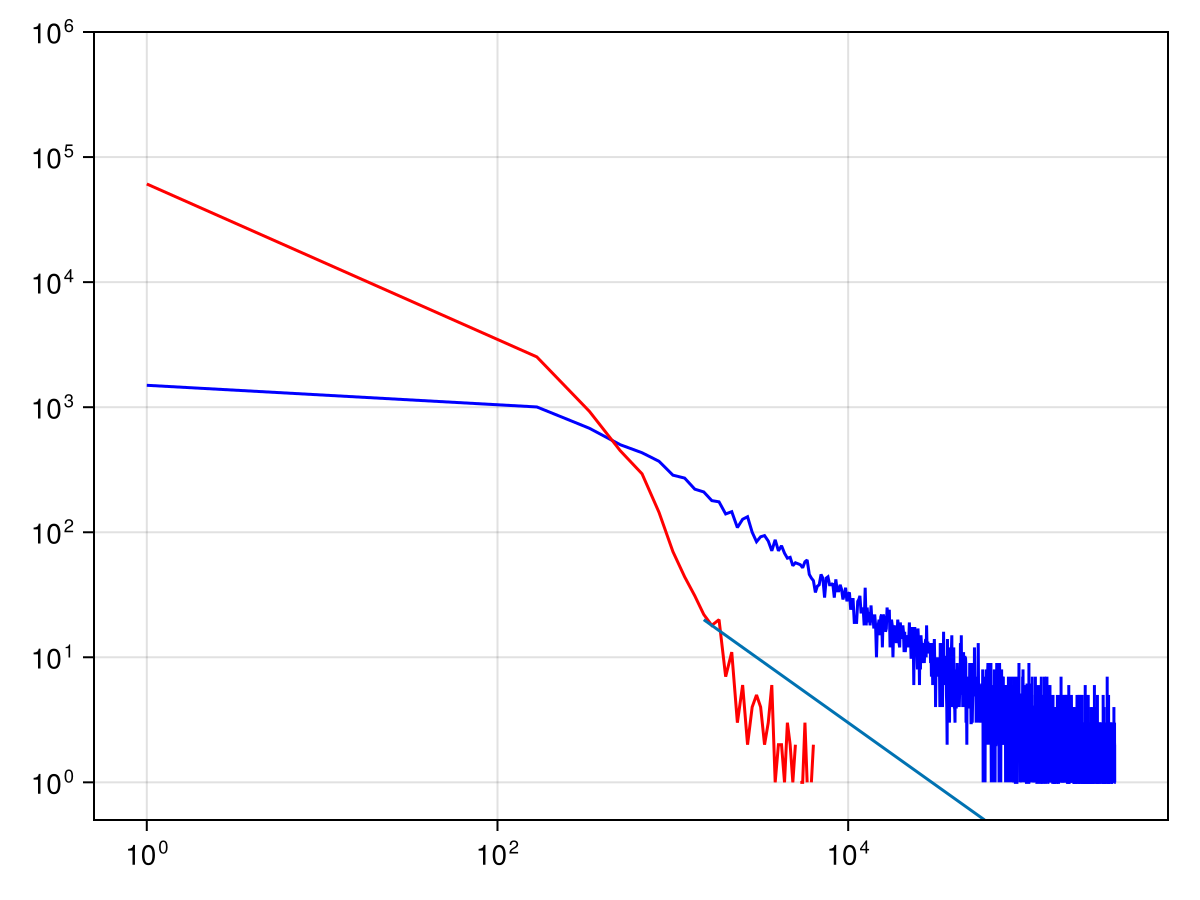

In [19]:
fig = Figure()
ω_min = 1
ω_max = 1000000/f

#bin_edges = @. exp(log(ω_min) + (log(ω_max/ω_min)*(0:(Nbins-1))/(Nbins-1)))
#bin_size = diff(exp.((0:(Nbins))/Nbins * log(ω_max / ω_min) ) * ω_min)
#index_function(ω) = exponential_array_index(ω, ω_min, ω_max, Nbins)


Nbins = 2000
bin_edges = @. ω_min .+ (ω_max - ω_min) * (0:Nbins)/Nbins


ax = Axis(fig[1,1]; xscale=log10, yscale=log10, limits=((ω_min/2, 2*ω_max), (0.5, 1e6)))
hist = fit(Histogram, ω/f, bin_edges, closed=:left)
hist2 = fit(Histogram, ω2/f, bin_edges, closed=:left)


lines!(ax, hist.edges[1][1:end-1], hist.weights, color=:blue)
lines!(ax, hist2.edges[1][1:end-1], hist2.weights, color=:red)
lines!(ax, bin_edges[10:end], 3e4*(bin_edges[10:end]).^(-1))
fig

In [6]:
sqrt.(sum(u.^2)/size(u, 1))/Cg

0.276354f0